# EDA for Kaggle NYC Rent data set

## Getting and loading data

If you have not done so already, please register at [kaggle.com](kaggle.com); I just signed in through my Google account so it was pretty easy.

Once you have registered, you can download the `train.json.zip` file on the [Two Sigma Connect: Rental Listing Inquiries](https://www.kaggle.com/c/two-sigma-connect-rental-listing-inquiries/data) data page.  I'm not allowed to re-host that data so you have to register and download yourself. Be organized and store that data file, and unzip it, in a standard data directory you will use for this course. In my case, I store it in a `data` directory underneath my notebooks directory.



In [2]:
import numpy as np
import pandas as pd

The file is stored in what we call the JSON (JavaScript object notation), rather than CSV, but pandas knows how to load it also:

In [9]:
df_rent = pd.read_json('data/train.json')

## Getting an initial sniff

Step one: how big is this thing and one of the column names and datatypes?

In [10]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [7]:
df_rent.head(2)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low


Okay, so this is a lot more complicated than the toys we've looked at so far. First, it has many more rows, almost 50,000. Second, there are a lot more columns and we have integers, floats, and strings.

Are there any missing values, at least those signified with NaN. There may be some values that were not physically missing but have sentinel values that indicate missing.  Luckily, there is no obviously missing data:

In [12]:
df_rent.isnull().any()

bathrooms          False
bedrooms           False
building_id        False
created            False
description        False
display_address    False
features           False
latitude           False
listing_id         False
longitude          False
manager_id         False
photos             False
price              False
street_address     False
interest_level     False
dtype: bool

Look at the sample data now and see what kind of stuff is in each column. There are three that are interesting from initial inspection: `features`, `photos`, and `interest_level`.

In [13]:
df_rent['features'].head(3)

4    [Dining Room, Pre-War, Laundry in Building, Di...
6    [Doorman, Elevator, Laundry in Building, Dishw...
9    [Doorman, Elevator, Laundry in Building, Laund...
Name: features, dtype: object

In [15]:
df_rent['photos'].head(3)

4    [https://photos.renthop.com/2/7170325_3bb5ac84...
6    [https://photos.renthop.com/2/7092344_7663c19a...
9    [https://photos.renthop.com/2/7158677_c897a134...
Name: photos, dtype: object

In [17]:
df_rent['interest_level'].head(3)

4    medium
6       low
9    medium
Name: interest_level, dtype: object

The first to look like lists of stuff and the last one looks like a categorical variable (which we'll deal with shortly).

In [26]:
df_rent.loc[6,'features'] # pick a row and show the list of features

['Doorman',
 'Elevator',
 'Laundry in Building',
 'Dishwasher',
 'Hardwood Floors',
 'No Fee']

In [27]:
df_rent.loc[6,'photos'] # pick a row and show the list of phone urls

['https://photos.renthop.com/2/7092344_7663c19af02c46104bc4c569f7162ae0.jpg',
 'https://photos.renthop.com/2/7092344_8287349abe511d195a7b6129bf24af0e.jpg',
 'https://photos.renthop.com/2/7092344_e9e6a2b7aa95aa7564fe3318cadcf4e7.jpg',
 'https://photos.renthop.com/2/7092344_d51ee4b92fd9246633f93afe6e86d8f0.jpg',
 'https://photos.renthop.com/2/7092344_f0573fa184ca130b1b6000f2fa90511c.jpg',
 'https://photos.renthop.com/2/7092344_b2a62f769a59a317b0a243000db46fd0.jpg']

Because we read in the data with JSON and not CSV,  pandas has created actual list objects for us. So these are not stored as strings but as lists. Anything nonnumeric, pandas stores as "Object":

In [57]:
df_rent['features'].dtype  # "O" is for object

dtype('O')

In [62]:
f = df_rent.loc[6,'features']
type(f)

list

## Identifying categorical variables

One of the features (columns) is clearly a categorical variable. In particular, it is an ordinal categorical variable; "ordinal" stands for ordered.

In [29]:
df_rent['interest_level'].unique()  # yep, looks like an ordinal categorical

array(['medium', 'low', 'high'], dtype=object)

So, let's convert it so that it has the proper data type:

In [51]:
df_rent['interest_level'] = df_rent['interest_level'].astype('category')
df_rent['interest_level']= df_rent['interest_level'].cat.as_ordered()
df_rent['interest_level']

4         medium
6            low
9         medium
10        medium
15           low
           ...  
124000       low
124002    medium
124004    medium
124008    medium
124009      high
Name: interest_level, Length: 49352, dtype: category
Categories (3, object): [low < medium < high]

That order doesn't look right so let's make sure that it goes from low to high.  The reason to do so is mainly for modeling purposes, but it's a good idea to be rigorous.

In [52]:
df_rent['interest_level'] = df_rent['interest_level'].cat.reorder_categories(['low','medium','high'])
df_rent['interest_level']

4         medium
6            low
9         medium
10        medium
15           low
           ...  
124000       low
124002    medium
124004    medium
124008    medium
124009      high
Name: interest_level, Length: 49352, dtype: category
Categories (3, object): [low < medium < high]

As implementation, it is really storing a dictionary that low=1, medium=2, etc...

## Basic exploration of numerical features

### Uniqueness, counts, histograms

In [97]:
df_rent['bedrooms'].unique()

array([1, 2, 3, 0, 4, 5, 6, 8, 7])

In [99]:
df_rent['bedrooms'].value_counts()

1    15752
2    14623
0     9475
3     7276
4     1929
5      247
6       46
8        2
7        2
Name: bedrooms, dtype: int64

In [98]:
df_rent['bathrooms'].unique()

array([ 1. ,  1.5,  2. ,  0. ,  3. ,  4. ,  2.5,  4.5,  3.5,  5. ,  6. ,
        6.5,  5.5,  7. , 10. ])

In [100]:
df_rent['bathrooms'].value_counts()

1.0     39422
2.0      7660
3.0       745
1.5       645
0.0       313
2.5       277
4.0       159
3.5        70
4.5        29
5.0        20
5.5         5
6.0         4
10.0        1
6.5         1
7.0         1
Name: bathrooms, dtype: int64

In [102]:
df_rent['manager_id'].value_counts()

e6472c7237327dd3903b3d6f6a94515a    2533
6e5c10246156ae5bdcd9b487ca99d96a     711
8f5a9c893f6d602f4953fcc0b8e6e9b4     410
62b685cc0d876c3a1a51d63a0d6a8082     402
cb87dadbca78fad02b388dc9e8f25a5b     373
                                    ... 
9109b784e9f37346d6ac176e02e340da       1
042dbeef9193e0e010520410faa54a4e       1
671d5720da16570d9d3b91e00367df89       1
f6d5173029809f4b1868c662aa7b3fe8       1
d15dbe3693748487fbcde36ad812b99d       1
Name: manager_id, Length: 3481, dtype: int64

In [104]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'   # svg vs png format make sharper images!

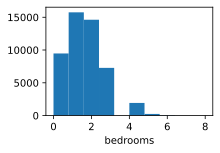

In [114]:
fig, ax = plt.subplots(figsize=(3,2))
ax.hist(df_rent['bedrooms'])
ax.set_xlabel("bedrooms")
plt.show()

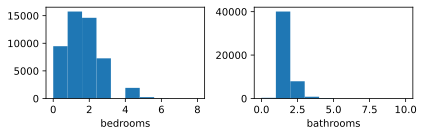

In [115]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6,2))
axes[0].hist(df_rent['bedrooms'])
axes[0].set_xlabel("bedrooms")
axes[1].hist(df_rent['bathrooms'])
axes[1].set_xlabel("bathrooms")
plt.tight_layout() #  Not sure why we need this but we do, to separate the plots!
plt.show()

### Hmm...an anomaly!

Another interesting histogram is the price:

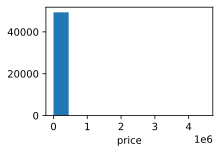

In [143]:
fig, ax = plt.subplots(figsize=(3,2))
ax.hist(df_rent['price'])
ax.set_xlabel("price")
plt.show()

Uh oh.  That looks very strange.  Let's look at a reverse sort of the prices:

In [145]:
df_rent['price'].sort_values(ascending=False).head(10)

32611     4490000
12168     1150000
57803     1070000
55437     1070000
123877     135000
4620       111111
91709      100000
54148       90000
116586      85000
96905       80000
Name: price, dtype: int64

Some of the apartments cost over 1 million a month! That doesn't make any sense.  How can this be?  After poking around a little bit, it will become clear that people are putting their apartments for sale not rent on this website as well. If we plot only those records with a maximum price of \$10,000 we'll see something a little more interesting.

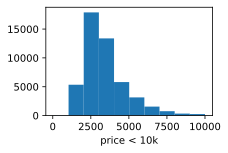

In [150]:
df_cheap = df_rent[df_rent['price']<=10_000]
fig, ax = plt.subplots(figsize=(3,2))
ax.hist(df_cheap['price'])
ax.set_xlabel("price < 10k")
plt.show()

We can even learn something interesting about how many photos people post about their apartments for rent.  Let's compute the length of each list of photos per record. The way we do that is to tell pandas to apply the Python `len` function to each element of the column:

In [117]:
numphotos = df_rent['photos'].apply(len)
numphotos.head(5)

4     12
6      6
9      6
10     5
15     4
Name: photos, dtype: int64

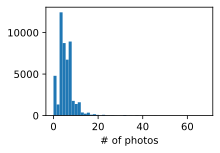

In [126]:
fig, ax = plt.subplots(figsize=(3,2))
ax.hist(numphotos, bins=50)
ax.set_xlabel("# of photos")
plt.show()

Why does the graph look weird? there must be something in the right tail.

In [128]:
numphotos.min(), numphotos.max()

(0, 68)

Someone posted 68 photos for the apartment. what?  The sounds like something we should investigate. We need to filter the data frame for those records with a lot of photos. The simplest approach is to inject the `numphotos` as a column and then use that as a filter.

In [131]:
df_rent['numphotos'] = numphotos
df_rent[df_rent['numphotos']>60]

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,numphotos
32963,3.0,3,0,2016-06-25 02:54:01,"BACK TO SCHOOL ! FAMILY HOME, three BIG bedroo...",The Somerset 1365 York Avenue,"[Fitness Center, Childrens Playroom, Residents...",40.7674,7214466,-73.9538,9df32cb8dda19d3222d66e69e258616b,[https://photos.renthop.com/2/7214466_4000a418...,7995,The Somerset 1365 York Avenue,low,68


It looks like it's just one record with that many images. Use the index to grab it and show the list of pictures for fun.

In [134]:
photos = df_rent.loc[32963, 'photos']
photos[0:5]

['https://photos.renthop.com/2/7214466_4000a418d3e449a7a0506c3166168393.jpg',
 'https://photos.renthop.com/2/7214466_67b015ddb5a7b7cf7370f865e2e533f9.jpg',
 'https://photos.renthop.com/2/7214466_0c86333bb7c566932a7709c395554db3.jpg',
 'https://photos.renthop.com/2/7214466_0aa3cc4dadeb2322116e7617bf812c29.jpg',
 'https://photos.renthop.com/2/7214466_33f3db4f14ba0f4fb3ae31846eda36d6.jpg']

Picking wanted random, here's what it looks like:<br>
<img src="https://photos.renthop.com/2/7214466_33f3db4f14ba0f4fb3ae31846eda36d6.jpg" width="150">

In [151]:
df_rent.loc[32963, 'price'] # how much per month? ~8k$

7995

I see nothing crazy about the apartment other than the number of images they posted. My conclusion is that they really want to rent this place, but nothing is suspicious.